In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 366s 2us/step


In [5]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

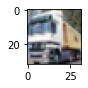

In [7]:
plot_sample(1)

In [8]:
#We will scale the images now since scaling help model to perform better.
#For scaling we will simply divide the samples by 255. rgb max value is 255
#The shape will remain same but now values will be between 0 and 1
x_train_scaled= X_train/255
x_test_scaled=X_test/255

In [9]:
#We will do one hot encoding by using keras .utils
y_train_categorical= keras.utils.to_categorical( y_train, num_classes=10, dtype='float32')
y_test_categorical= keras.utils.to_categorical( y_test, num_classes=10, dtype='float32')

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
#now we build model
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    #we will use 10 neurons cuz of 10 classes
    keras.layers.Dense(10, activation='sigmoid')#sigmoid is good with classification
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy', #we are using one hot encoding in y_train thats y we are using this loss if we had y_train in original then sparse
             metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5405 - accuracy: 0.4576
Epoch 4/50
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4803 - accuracy: 0.4795
Epoch 5/50
1563/1563 [==============================] - 137s 88ms/step - loss: 1.4328 - accuracy: 0.4950
Epoch 6/50
1563/1563 [==============================] - 140s 89ms/step - loss: 1.2525 - accuracy: 0.5593
Epoch 11/50
1563/1563 [==============================] - 142s 91ms/step - loss: 1.2244 - accuracy: 0.5707
Epoch 12/50
1563/1563 [==============================] - 151s 97ms/step - loss: 1.1946 - accuracy: 0.5820
Epoch 13/50
1563/1563 [==============================] - 159s 102ms/step - loss: 1.1133 - accuracy: 0.6100
Epoch 16/50
1563/1563 [==============================] - 154s 99ms/step - loss: 1.0863 - accuracy: 0.6179
Epoch 17/50
1563/1563 [==============================] - 166s 106ms/step - loss: 1.0124 - accuracy: 0.6462
Epoch 20/50
1563/1563 [=========================

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[np.argmax(model.predict(x_test_scaled)[1])]

'ship'

In [17]:
classes[y_test[1][0]]

'ship'